In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# https://www.kaggle.com/datasets/yehorkorzh/imdb-top-250-movies
# Import of IMDB top 250 Movies dataset
movie_metadata_path = "C:/Users/sholl/OneDrive/Desktop/GIT/Project-1/Resources/imdb_top250_movies.csv"
movie_data_complete = pd.read_csv(movie_metadata_path)


# https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv
#Import of The Movies dataset (revenue and budget data)
movie_bulk_data = "C:/Users/sholl/OneDrive/Desktop/GIT/Project-1/Resources/movies_metadata.csv"
movie_metadata = pd.read_csv(movie_bulk_data, low_memory=False)
movie_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [3]:
# Clean IMDB data to remove unneeded rows
movie_data_clean= movie_data_complete.drop(columns=['Unnamed: 0','imdbID','Metascore','Plot','Actors','DVD',
                                                    'Type','Website','Awards','Writer','Country','Language'])
movie_data_clean['Runtime'] = movie_data_clean['Runtime'].str.replace('min', '')
movie_data_clean['Runtime'] = movie_data_clean['Runtime'].astype(int)

# Copy IMDB Cleaned dataset to merge with revenue/budget data
movie_data_copy = movie_data_clean.copy()

# Reset index so that index # is the same as rating number.
movie_data_clean = movie_data_clean.set_index('Num')
movie_data_clean.head()

,Title,Year,Released,Runtime,Genre,Director,imdbRating,imdbVotes,BoxOffice,Production
Num,,,,,,,,,,
1,The Shawshank Redemption,1994,14 Oct 1994,142,"Crime, Drama",Frank Darabont,9.3,"1,825,626",NaN,Columbia Pictures
2,The Godfather,1972,24 Mar 1972,175,"Crime, Drama",Francis Ford Coppola,9.2,"1,243,444",NaN,Paramount Pictures
3,The Godfather: Part II,1974,20 Dec 1974,202,"Crime, Drama",Francis Ford Coppola,9.0,"856,870",NaN,Paramount Pictures
4,The Dark Knight,2008,18 Jul 2008,152,"Action, Crime, Drama",Christopher Nolan,9.0,"1,802,351","$533,316,061",Warner Bros. Pictures/Legendary
5,12 Angry Men,1957,01 Apr 1957,96,"Crime, Drama",Sidney Lumet,8.9,"494,215",NaN,Criterion Collection


In [4]:
# Clean Revenue/Budget data for merging
metadata_clean = movie_metadata[["original_title", "revenue", "budget"]]
metadata_clean = metadata_clean.rename(columns={"original_title":"Title", "revenue":"BoxOffice"})
metadata_merge = pd.merge(movie_data_copy, metadata_clean, on="Title")
metadata_merge['budget'] = metadata_merge.loc[:, 'budget'].astype(int)

# Filter out zero value rows from merged dataset
metadata_merge['BoxOffice_y'] = metadata_merge.loc[:, 'BoxOffice_y'].astype(int)
metadata_merge = metadata_merge[metadata_merge["BoxOffice_y"] > 1000]
metadata_merge = metadata_merge[metadata_merge["budget"] > 1000]

# Clean up merged dataset for analysis
# metadata_merge['BoxOffice_y'] = metadata_merge.loc[:, 'BoxOffice_y'].astype(int)
metadata_merge = metadata_merge.rename(columns={"BoxOffice_y":"Revenue","budget":"Budget"})
metadata_merge = metadata_merge.drop(columns=["BoxOffice_x"])
# Correct sort back to index value
metadata_merge.sort_index()
# Reset index to rating number
movie_data_with_revenue = metadata_merge.set_index('Num')
movie_data_with_revenue = movie_data_with_revenue.drop_duplicates(subset=['Title'], keep= 'last')
movie_data_with_revenue.head()

,Title,Year,Released,Runtime,Genre,Director,imdbRating,imdbVotes,Production,Revenue,Budget
Num,,,,,,,,,,,
1,The Shawshank Redemption,1994,14 Oct 1994,142,"Crime, Drama",Frank Darabont,9.3,"1,825,626",Columbia Pictures,28341469,25000000
2,The Godfather,1972,24 Mar 1972,175,"Crime, Drama",Francis Ford Coppola,9.2,"1,243,444",Paramount Pictures,245066411,6000000
3,The Godfather: Part II,1974,20 Dec 1974,202,"Crime, Drama",Francis Ford Coppola,9.0,"856,870",Paramount Pictures,47542841,13000000
4,The Dark Knight,2008,18 Jul 2008,152,"Action, Crime, Drama",Christopher Nolan,9.0,"1,802,351",Warner Bros. Pictures/Legendary,1004558444,185000000
5,12 Angry Men,1957,01 Apr 1957,96,"Crime, Drama",Sidney Lumet,8.9,"494,215",Criterion Collection,1000000,350000


In [5]:
#change "Year" column type to string
movie_data_with_revenue['Year'] = movie_data_with_revenue['Year'].astype(str)

#seperate each decade of movies into their own dataframe and find the mean of each.
twen_movies = movie_data_with_revenue.loc[movie_data_with_revenue['Year'].str.contains("192", case=False)]
twen_movies_avg = twen_movies["Runtime"].mean()

thir_movies = movie_data_with_revenue.loc[movie_data_with_revenue['Year'].str.contains("193", case=False)]
thir_movies_avg = thir_movies["Runtime"].mean()

four_movies = movie_data_with_revenue.loc[movie_data_with_revenue['Year'].str.contains("194", case=False)]
four_movies_avg = four_movies["Runtime"].mean()

fift_movies = movie_data_with_revenue.loc[movie_data_with_revenue['Year'].str.contains("195", case=False)]
fift_movies_avg = fift_movies["Runtime"].mean()

sixt_movies = movie_data_with_revenue.loc[movie_data_with_revenue['Year'].str.contains("196", case=False)]
sixt_movies_avg = sixt_movies["Runtime"].mean()

seve_movies = movie_data_with_revenue.loc[movie_data_with_revenue['Year'].str.contains("197", case=False)]
seve_movies_avg = seve_movies["Runtime"].mean()

eigh_movies = movie_data_with_revenue.loc[movie_data_with_revenue['Year'].str.contains("198", case=False)]
eigh_movies_avg = eigh_movies["Runtime"].mean()

nint_movies = movie_data_with_revenue.loc[movie_data_with_revenue['Year'].str.contains("199", case=False)]
nint_movies_avg = nint_movies["Runtime"].mean()

aughts_movies = movie_data_with_revenue.loc[movie_data_with_revenue['Year'].str.contains("200", case=False)]
aughts_movies_avg = aughts_movies["Runtime"].mean()

tens_movies = movie_data_with_revenue.loc[movie_data_with_revenue['Year'].str.contains("201", case=False)]
tens_movies_avg = tens_movies["Runtime"].mean()

twen_movies


,Title,Year,Released,Runtime,Genre,Director,imdbRating,imdbVotes,Production,Revenue,Budget
Num,,,,,,,,,,,
66,The Kid,1921,06 Feb 1921,68,"Comedy, Drama, Family",Charles Chaplin,8.3,"76,513",First National Pictures Inc.,69700000,65000000
99,The Gold Rush,1925,NaN,95,"Adventure, Comedy, Drama",Charles Chaplin,8.2,"73,848",Janus Films,2500000,923000


In [6]:
#Reduce budget and revenue numbers to a more managable and readble size for graphing
movie_data_with_revenue['Budget'] = movie_data_with_revenue['Budget'].div(10000).round(2)
movie_data_with_revenue['Revenue'] = movie_data_with_revenue['Revenue'].div(10000).round(2)
movie_data_with_revenue.head()

,Title,Year,Released,Runtime,Genre,Director,imdbRating,imdbVotes,Production,Revenue,Budget
Num,,,,,,,,,,,
1,The Shawshank Redemption,1994,14 Oct 1994,142,"Crime, Drama",Frank Darabont,9.3,"1,825,626",Columbia Pictures,2834.15,2500.0
2,The Godfather,1972,24 Mar 1972,175,"Crime, Drama",Francis Ford Coppola,9.2,"1,243,444",Paramount Pictures,24506.64,600.0
3,The Godfather: Part II,1974,20 Dec 1974,202,"Crime, Drama",Francis Ford Coppola,9.0,"856,870",Paramount Pictures,4754.28,1300.0
4,The Dark Knight,2008,18 Jul 2008,152,"Action, Crime, Drama",Christopher Nolan,9.0,"1,802,351",Warner Bros. Pictures/Legendary,100455.84,18500.0
5,12 Angry Men,1957,01 Apr 1957,96,"Crime, Drama",Sidney Lumet,8.9,"494,215",Criterion Collection,100.00,35.0


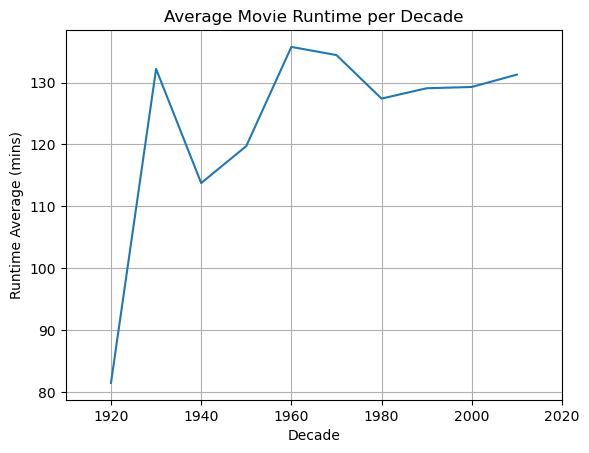

In [7]:
#PLotting the runtime averages vs the decade the movie came out
avg_runtime = [twen_movies_avg,thir_movies_avg,four_movies_avg,fift_movies_avg,sixt_movies_avg,
             seve_movies_avg,eigh_movies_avg,nint_movies_avg,aughts_movies_avg,tens_movies_avg]

Year = np.arange(1920,2020,10)

plt.plot(Year, avg_runtime)
plt.ylabel("Runtime Average (mins)")
plt.xlabel("Decade")
plt.title("Average Movie Runtime per Decade")
plt.xlim([1910, 2020])
plt.grid()
plt.savefig("C:/Users/sholl/OneDrive/Desktop/Runtime.png")
plt.show()

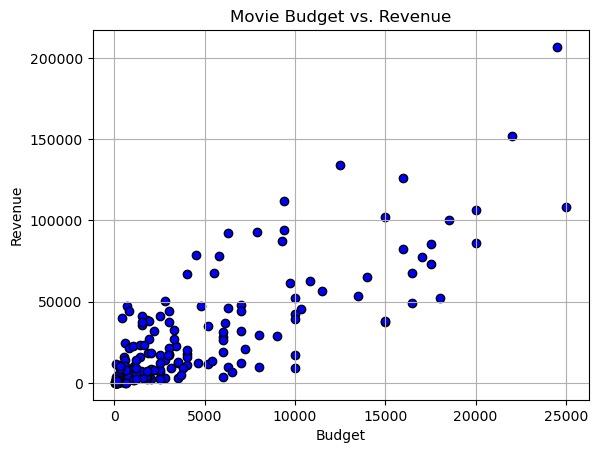

In [8]:
#Plotting budget vs revenue as a scatterplot 

budget = movie_data_with_revenue['Budget']
revenue = movie_data_with_revenue['Revenue']

plt.scatter(budget, revenue, marker="o", facecolors="blue", edgecolors="black")
plt.title("BU")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Movie Budget vs. Revenue")
plt.grid()
plt.savefig("C:/Users/sholl/OneDrive/Desktop/budgetscatter.png")
plt.show()

The r-value is: 0.6776270389197852


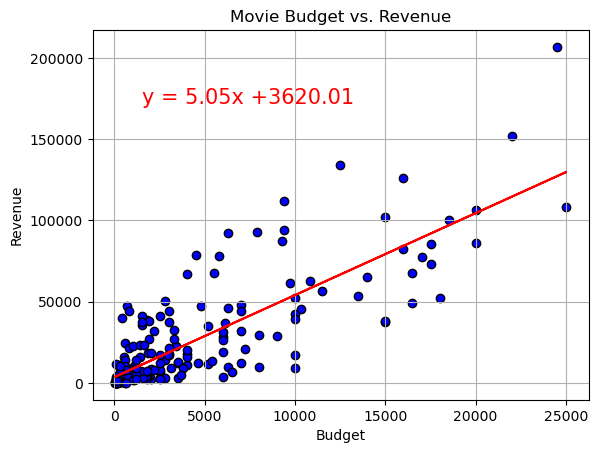

In [9]:
#PLacing a line regression and r value to previous plot
plt.scatter(budget, revenue, marker="o", facecolors="blue", edgecolors="black")
LR_slope, LR_int, LR_r, LR_p, LR_std_err = linregress(budget, revenue)
LR_fit = LR_slope * budget + LR_int
line_eq = "y = " + str(round(LR_slope,2)) + "x +" + str(round(LR_int,2))
plt.plot(budget,LR_fit,color = "red",label='y={:.2f}x+{:.2f}'.format(LR_slope,LR_int))
plt.grid()
plt.title("Movie Budget vs. Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.annotate(line_eq,xy=(0.1, 0.8),xycoords='axes fraction',fontsize=15,color="red")
print(f"The r-value is: {LR_r**2}")
plt.savefig("C:/Users/sholl/OneDrive/Desktop/BudgetLinre.png")
plt.show()